In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('cleaned_data.csv')

def analyze_university_performance():
    # Performance Analysis by Region
    regional_performance = df.groupby('Location.1')['OVERALL_SCORE'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    print("Regional Performance Summary:")
    print(regional_performance)
    
    # Performance Analysis by Size Classification
    size_performance = df.groupby('SIZE')['OVERALL_SCORE'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    print("\nPerformance by University Size:")
    print(size_performance)
    
    # Performance Analysis by Focus Classification
    focus_performance = df.groupby('FOCUS')['OVERALL_SCORE'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    print("\nPerformance by University Focus:")
    print(focus_performance)
    
    # Correlation between different scoring metrics
    scoring_metrics = ['AR_SCORE', 'ER_SCORE', 'FS_SCORE', 'CF_SCORE', 'IF_SCORE', 'IS_SCORE', 'IRN_SCORE', 'EO_SCORE', 'S_Score']
    correlation_matrix = df[scoring_metrics].corr()
    print("\nCorrelation Matrix of Scoring Metrics:")
    print(correlation_matrix)
    
    return regional_performance, size_performance, focus_performance, correlation_matrix

def visualize_performance():
    plt.figure(figsize=(15, 10))
    
    # Regional Performance Boxplot
    plt.subplot(2, 2, 1)
    sns.boxplot(x='Location.1', y='OVERALL_SCORE', data=df, order=df.groupby('Location.1')['OVERALL_SCORE'].mean().sort_values(ascending=False).index)
    plt.title('University Performance by Region')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Size Classification Performance
    plt.subplot(2, 2, 2)
    sns.boxplot(x='SIZE', y='OVERALL_SCORE', data=df)
    plt.title('University Performance by Size')
    
    # Focus Classification Performance
    plt.subplot(2, 2, 3)
    sns.boxplot(x='FOCUS', y='OVERALL_SCORE', data=df)
    plt.title('University Performance by Focus')
    plt.xticks(rotation=45, ha='right')
    
    # Heatmap of Scoring Metrics Correlation
    plt.subplot(2, 2, 4)
    scoring_metrics = ['AR_SCORE', 'ER_SCORE', 'FS_SCORE', 'CF_SCORE', 'IF_SCORE', 'IS_SCORE', 'IRN_SCORE', 'EO_SCORE', 'S_Score']
    sns.heatmap(df[scoring_metrics].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation of Scoring Metrics')
    
    plt.tight_layout()
    plt.show()



Regional Performance Summary:
                                mean  count
Location.1                                 
Singapore                  88.600000      2
Hong Kong SAR              67.266667      6
Switzerland                59.325000      8
Mexico                     54.500000      2
United Kingdom             54.102273     44
Australia                  53.779167     24
United States              51.882667     75
Netherlands                51.607692     13
Sweden                     51.112500      8
Japan                      50.623077     13
Canada                     50.088235     17
France                     49.283333     12
Qatar                      48.700000      1
Malaysia                   48.528571      7
Denmark                    46.380000      5
Chile                      45.766667      3
South Korea                45.392857     14
Belgium                    44.942857      7
Germany                    43.808000     25
Ireland                    42.000000      5
Le

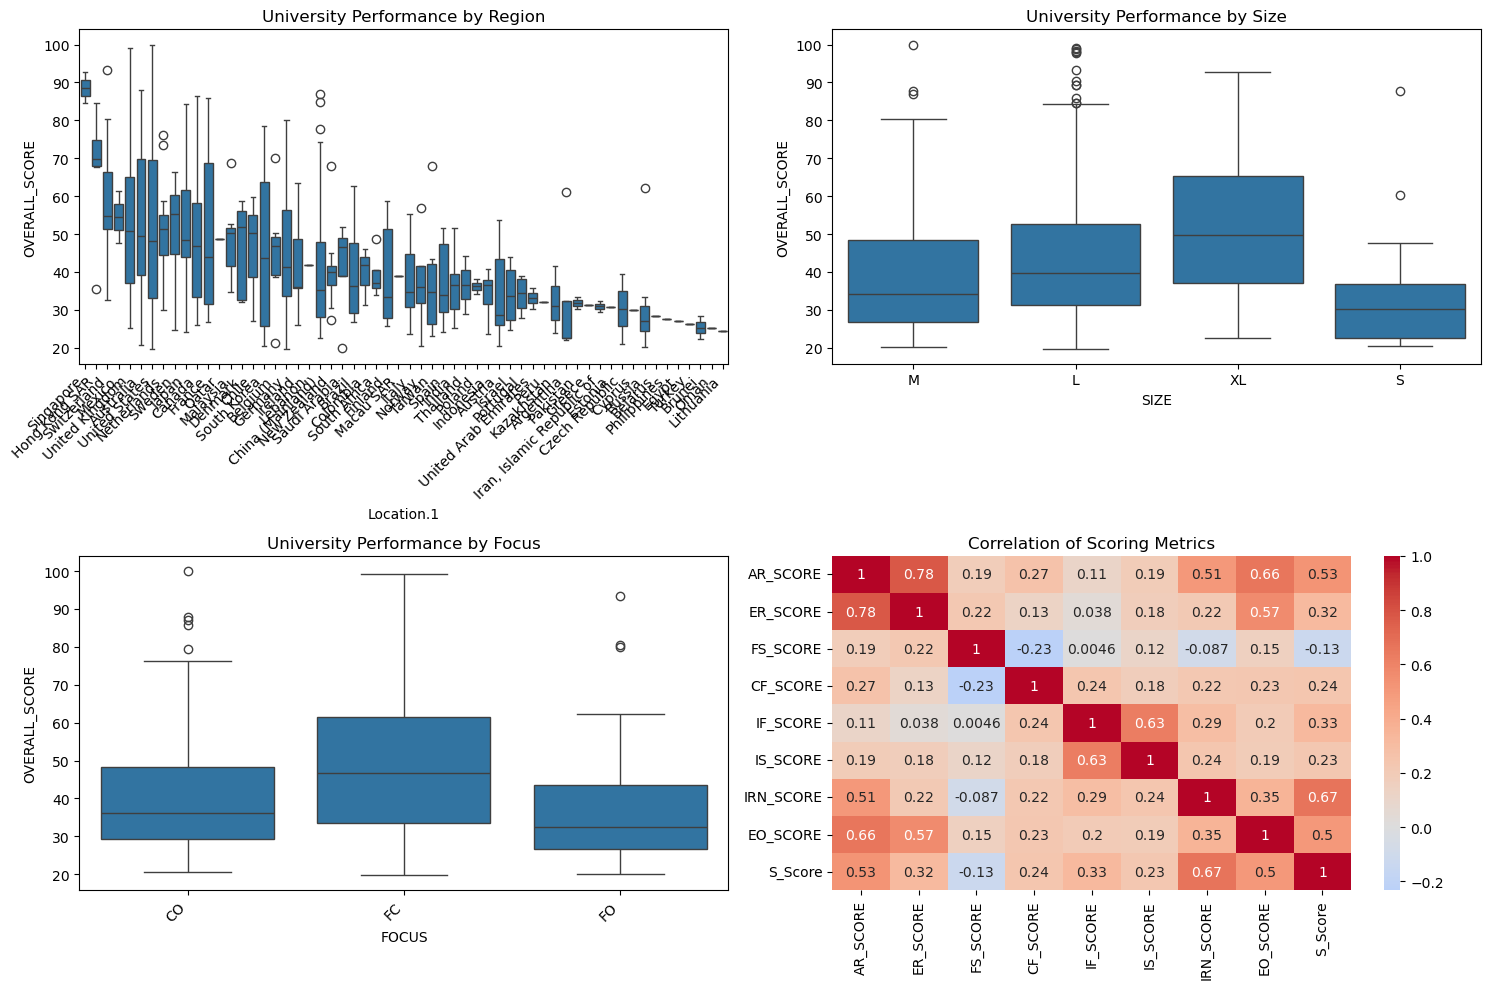

In [3]:
# Run the analysis
regional_perf, size_perf, focus_perf, corr_matrix = analyze_university_performance()
visualize_performance()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('cleaned_data.csv')

# Prepare the data
df['Rank_Change'] = df['2023_RANK'] - df['2024_RANK']

def create_visualizations():
    plt.figure(figsize=(20, 15))
    
    # 1. Bar Chart: Average Overall Score by Region
    plt.subplot(2, 2, 1)
    region_avg = df.groupby('Location.1')['OVERALL_SCORE'].mean().sort_values(ascending=False)
    region_avg.plot(kind='bar')
    plt.title('Average Overall Score by Region')
    plt.xlabel('Region')
    plt.ylabel('Average Overall Score')
    plt.xticks(rotation=45, ha='right')
    
    # 2. Bar Chart: Average Overall Score by University Size
    plt.subplot(2, 2, 2)
    size_avg = df.groupby('SIZE')['OVERALL_SCORE'].mean().sort_values(ascending=False)
    size_avg.plot(kind='bar')
    plt.title('Average Overall Score by University Size')
    plt.xlabel('University Size')
    plt.ylabel('Average Overall Score')
    
    # 3. Boxplot: Overall Score Distribution by Region
    plt.subplot(2, 2, 3)
    sns.boxplot(x='Location.1', y='OVERALL_SCORE', data=df, order=region_avg.index)
    plt.title('Overall Score Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Overall Score')
    plt.xticks(rotation=45, ha='right')
    
    # 4. Boxplot: Overall Score Distribution by University Size
    plt.subplot(2, 2, 4)
    sns.boxplot(x='SIZE', y='OVERALL_SCORE', data=df)
    plt.title('Overall Score Distribution by University Size')
    plt.xlabel('University Size')
    plt.ylabel('Overall Score')
    
    plt.tight_layout()
    plt.show()
    
    # Line Chart: Rank Changes
    plt.figure(figsize=(15, 6))
    plt.scatter(df['2023_RANK'], df['2024_RANK'])
    plt.plot([0, df['2023_RANK'].max()], [0, df['2023_RANK'].max()], color='red', linestyle='--')
    plt.title('University Rank Changes (2023 vs 2024)')
    plt.xlabel('2023 Rank')
    plt.ylabel('2024 Rank')
    plt.show()
    
    # Descriptive Statistics
    print("Descriptive Statistics for Overall Score:")
    print(df['OVERALL_SCORE'].describe())
    
    print("\nAverage Overall Score by Region:")
    print(region_avg)
    
    print("\nAverage Overall Score by University Size:")
    print(size_avg)
    
    # Rank Change Analysis
    print("\nTop 10 Universities with Most Positive Rank Change:")
    print(df.nlargest(10, 'Rank_Change')[['Institution_Name', 'Rank_Change', '2023_RANK', '2024_RANK']])
    
    print("\nTop 10 Universities with Most Negative Rank Change:")
    print(df.nsmallest(10, 'Rank_Change')[['Institution_Name', 'Rank_Change', '2023_RANK', '2024_RANK']])


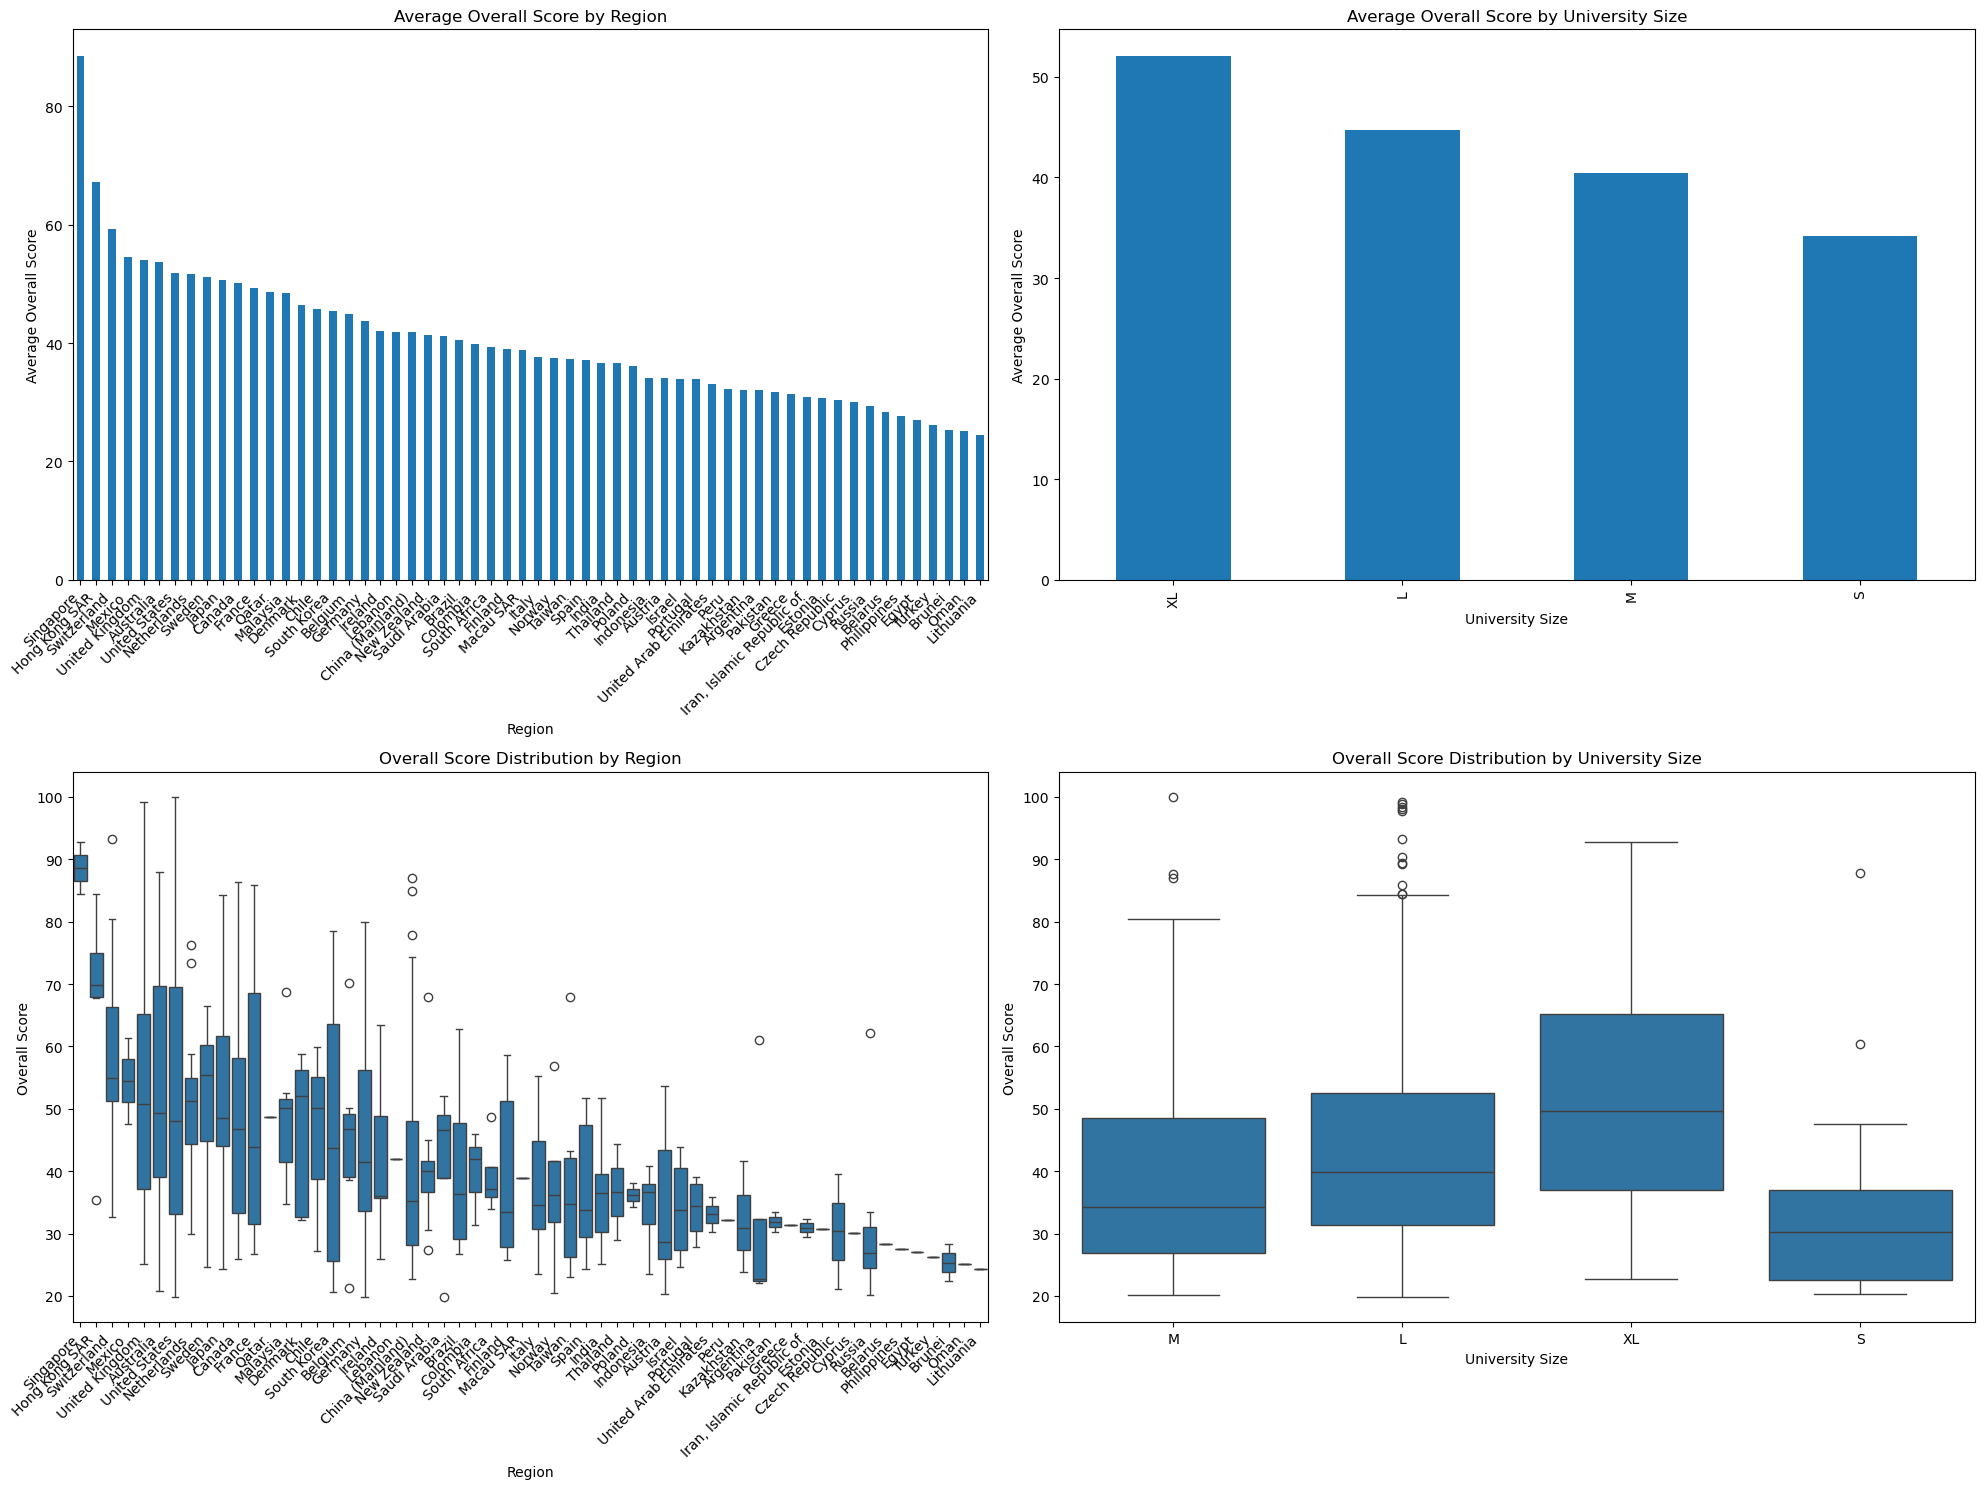

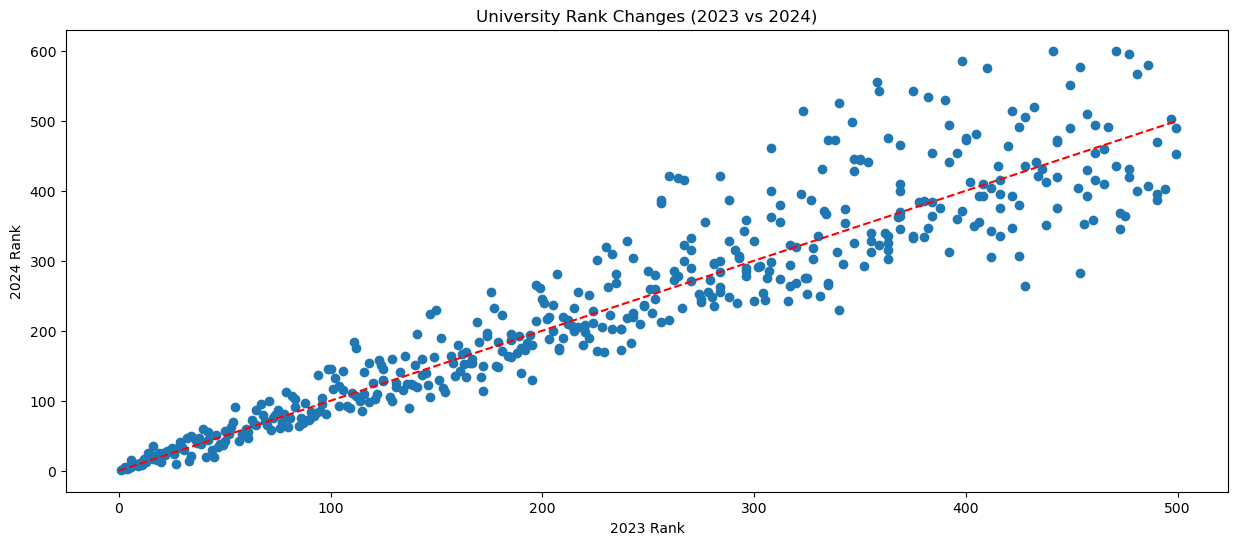

Descriptive Statistics for Overall Score:
count    457.000000
mean      45.861707
std       18.951341
min       19.800000
25%       30.900000
50%       41.200000
75%       56.900000
max      100.000000
Name: OVERALL_SCORE, dtype: float64

Average Overall Score by Region:
Location.1
Singapore                    88.600000
Hong Kong SAR                67.266667
Switzerland                  59.325000
Mexico                       54.500000
United Kingdom               54.102273
Australia                    53.779167
United States                51.882667
Netherlands                  51.607692
Sweden                       51.112500
Japan                        50.623077
Canada                       50.088235
France                       49.283333
Qatar                        48.700000
Malaysia                     48.528571
Denmark                      46.380000
Chile                        45.766667
South Korea                  45.392857
Belgium                      44.942857
Germany        

In [5]:
# Run the analysis
create_visualizations()